In [ ]:
# https://www.tensorflow.org/tutorials/keras/text_classification
# tensorflow, practice

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)

2.3.0


In [ ]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [ ]:
print(len(train_data)  )
print(len(train_labels)  )
print(len(test_data)  )
print(len(test_labels)  )

print(train_data[0]  )
print(train_labels[0]  )
print(test_data[0]  )
print(test_labels[0]  )

print(len(train_data[0]) )
print(len(train_data[1]) )

# 将整数转换回单词
word_index = imdb.get_word_index()

word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])



In [ ]:
movie_review = decode_review(train_data[0])
print(len(movie_review))

i = 0
while i < 10:
  print(len(train_data[i]) )
  i = i + 1

# 准备数据
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding='post', maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding='post', maxlen=256)

print()
i = 0
while i < 10:
  print(len(train_data[i]) )
  i = i + 1

print()
print(train_data[0])

In [ ]:
# 构建模型
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary() 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 创建一个验证集
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

In [ ]:
results = model.evaluate(test_data,  test_labels, verbose=2)
print(results)

history_dict = history.history
history_dict.keys()

782/782 - 1s - loss: 0.3318 - accuracy: 0.8723
[0.331784188747406, 0.8723199963569641]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

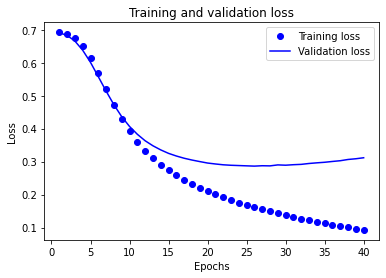

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b代表“蓝色实线”
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

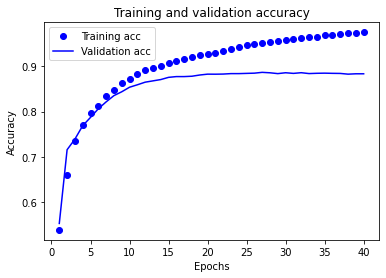

In [ ]:
plt.clf()   # 清除数字

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()